In [1]:
%run "../../shared/utilz_includez.ipynb"

In [36]:
from skimage import io, img_as_float, img_as_ubyte

## filterrs and denoising
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma

In [75]:
seg_colorz = [ (1, 0, 0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1, 1), (1, 1, 1), (0,0,0) ]

def plot_image( img_array , plotit=True, title=None, cmapd='gray'):     
    print( f"\n{ '-'*7 } { title if title else type(img_array) } { '-'*7 }" )
    print( f"image.shape = {img_array.shape}" ) 
    print( f"datatype = {img_array.dtype}")
    print( f"min = {np.min(img_array)} , max = {np.max(img_array)}\n" )
    if plotit:
        if cmapd:
            plt.imshow( img_array , cmap=cmapd)
        else:
            plt.imshow( img_array )
    if title:
        plt.title(title)
        

def denoised_image(img, patch_size=5, patch_distance=3, multichannel=True):
    sig = np.mean( estimate_sigma(img, multichannel=True) )
    dimg = img_as_ubyte( 
        denoise_nl_means(img, h=1.15*sig, fast_mode=False, 
                         patch_size=patch_size, patch_distance=patch_distance, 
                         multichannel=multichannel) )
    return dimg

def gen_histogram_image( segz,  dimz, segz_c=seg_colorz ):  
    all_segz_cleaner = np.zeros( dimz )
    for seg, cr in zip(segz, segz_c):
        k = np.ones( (3,3)) 
        z = nd.binary_closing(   nd.binary_opening(  seg, k) ,  k)
        all_segz_cleaner[ z ] = cr
    return all_segz_cleaner 

# Random Walker Segmentation
- 

## 1. Histogram Segmentation Recall

In [33]:
imgpath = "https://image.shutterstock.com/image-photo/cross-section-skin-tissue-microscopic-260nw-303503024.jpg"
# imgpath = "https://ak.picdn.net/shutterstock/videos/1012767437/thumb/1.jpg?ip=x480"
# imgpath = "https://upload.wikimedia.org/wikipedia/commons/a/a0/SkinTumors-P7110453.JPG"
#imgpath = "https://www.jai.com/uploads/images/_transContentImage765xAuto/Skin-cells-bright-field.jpg"
#imgpath = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR_X7PDZCN8vF_OWSVJD9WG_rU3WZMkG99nwdotwCM9uD3gp_X4&usqp=CAU"


dimg.shape = (280, 365)

----------
Original image
image.shape = (280, 365)
datatype = float64
min = 0.008080392156862744 , max = 1.0



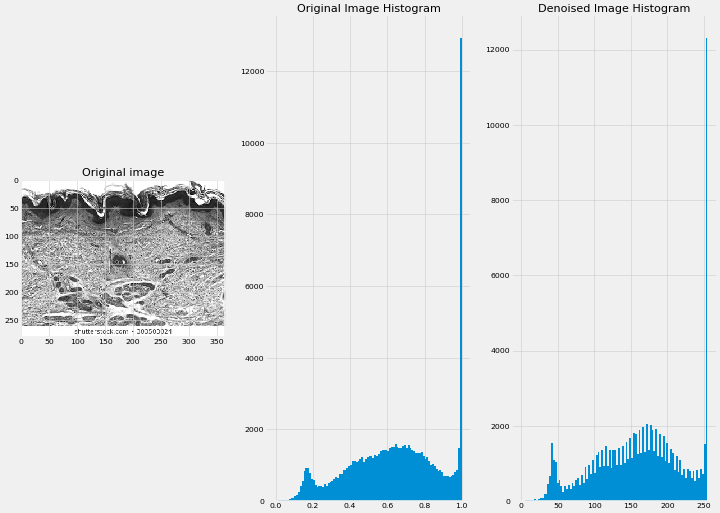

In [50]:
img = img_as_float( io.imread( imgpath, as_gray=True) )

dimg = denoised_image( img )

print( f"dimg.shape = {dimg.shape}" )

plt.subplot(1, 3, 1)
plot_image( img , title='Original image', plotit=True)

plt.subplot(1,3, 2)
plt.hist( img.flat, bins=100, range=(0,1)); 
plt.title( 'Original Image Histogram')

plt.subplot(1, 3, 3)
plt.hist( dimg.flat, bins=100, range=(0,255));  
plt.title( 'Denoised Image Histogram'); 


----------
Denoised Imaged
image.shape = (280, 365)
datatype = uint8
min = 3 , max = 255


----------
Histogram Segmentation
image.shape = (280, 365, 3)
datatype = float64
min = 0.0 , max = 1.0



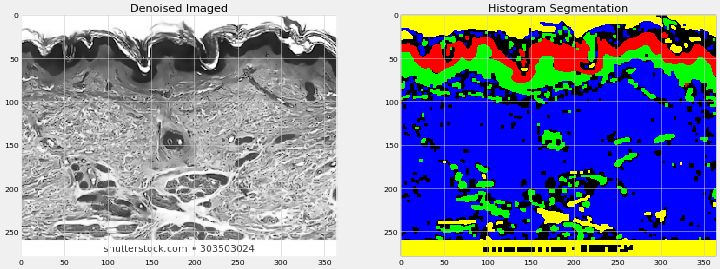

In [58]:
dsegz = []
dsegz.append( dimg <= 60 )
dsegz.append( (dimg > 60) & (dimg <= 125) )
dsegz.append( (dimg > 125) & (dimg <= 240) )
dsegz.append( dimg > 240 )

histo_seg_img = gen_histogram_image( 
    dsegz,
    (*dimg.shape, 3)
)



plt.subplot(1, 2, 1)
plot_image( dimg , title="Denoised Imaged"); 

plt.subplot(1,2,2)
plot_image( histo_seg_img, title="Histogram Segmentation"); 

---

dimg.shape = (225, 225)

----------
Original image
image.shape = (225, 225)
datatype = float64
min = 0.0 , max = 1.0



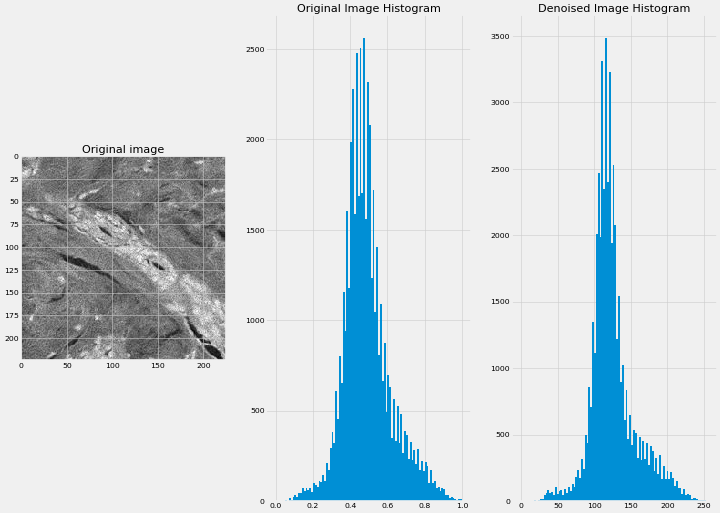

In [59]:
imgpath = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR_X7PDZCN8vF_OWSVJD9WG_rU3WZMkG99nwdotwCM9uD3gp_X4&usqp=CAU"
img = img_as_float( io.imread( imgpath, as_gray=True) )

dimg = denoised_image( img )

print( f"dimg.shape = {dimg.shape}" )

plt.subplot(1, 3, 1)
plot_image( img , title='Original image', plotit=True)

plt.subplot(1,3, 2)
plt.hist( img.flat, bins=100, range=(0,1)); 
plt.title( 'Original Image Histogram')

plt.subplot(1, 3, 3)
plt.hist( dimg.flat, bins=100, range=(0,255));  
plt.title( 'Denoised Image Histogram'); 


----------
Denoised Imaged
image.shape = (225, 225)
datatype = uint8
min = 3 , max = 255


----------
Histogram Segmentation
image.shape = (225, 225, 3)
datatype = float64
min = 0.0 , max = 1.0



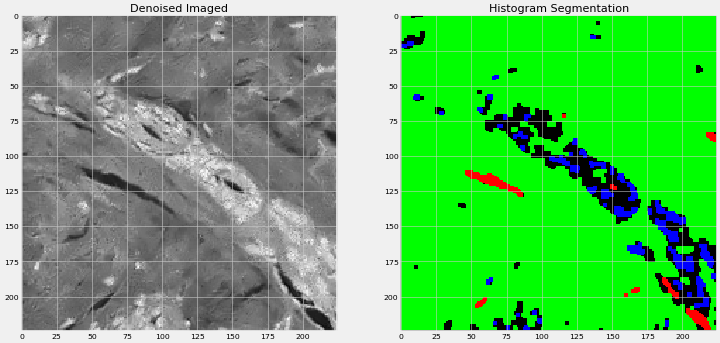

In [60]:
dsegz = []
dsegz.append( dimg <= 60 )
dsegz.append( (dimg > 60) & (dimg <= 175) )
dsegz.append( (dimg > 175) & (dimg <= 225) )
dsegz.append( dimg > 225 )

histo_seg_img = gen_histogram_image( 
    dsegz,
    (*dimg.shape, 3)
)



plt.subplot(1, 2, 1)
plot_image( dimg , title="Denoised Imaged"); 

plt.subplot(1,2,2)
plot_image( histo_seg_img, title="Histogram Segmentation"); 

## 2. Using RandomWalker Segmentation
- Great where there's no clear visual differences??


----------
Denoised image
image.shape = (225, 225)
datatype = uint8
min = 5 , max = 255



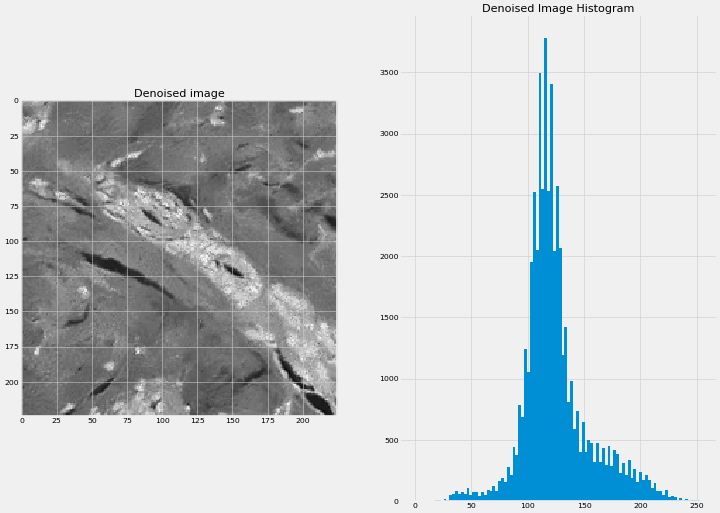

In [68]:
dimg = denoised_image( img , patch_size=5, patch_distance=6 )


plt.subplot(1, 2, 1)
plot_image( dimg , title='Denoised image', plotit=True)

plt.subplot(1,2, 2)
plt.hist( dimg.flat, bins=100, range=(0,255)); 
plt.title( 'Denoised Image Histogram'); 



------- Original -------
image.shape = (225, 225)
datatype = float64
min = 0.0 , max = 1.0


------- Denoised and Equalized -------
image.shape = (225, 225)
datatype = float64
min = 0.0 , max = 1.0



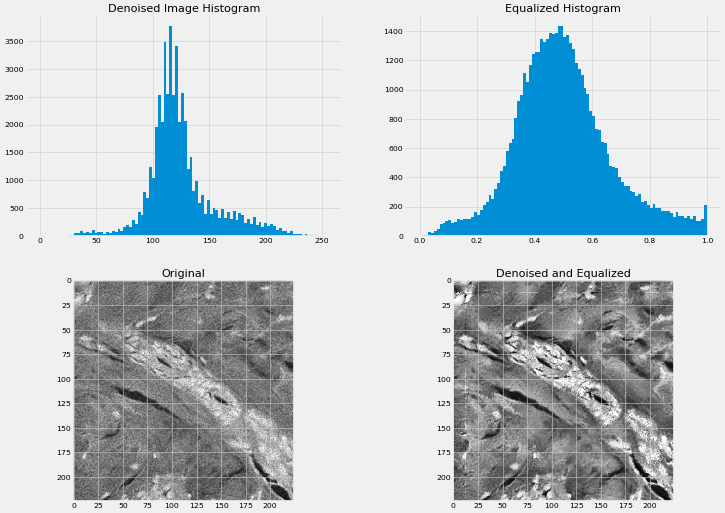

In [76]:
## Equalized Image 1). Equalize_hist is more aggressive than 2). Adaptive 
from skimage import exposure
edimg = exposure.equalize_adapthist( dimg )


plt.subplot(2,2, 1)
plt.hist( dimg.flat, bins=100, range=(0,255)); 
plt.title( 'Denoised Image Histogram'); 

plt.subplot(2,2, 2)
plt.hist( edimg.flat, bins=100, range=(0,1)); 
plt.title( 'Equalized Histogram'); 

plt.subplot(2,2,3)
plot_image(img, title='Original')

plt.subplot(2,2,4)
plot_image(edimg, title='Denoised and Equalized'); 



------- Denoised & Equalized image -------
image.shape = (225, 225)
datatype = float64
min = 0.0 , max = 1.0


------- Markers -------
image.shape = (225, 225)
datatype = uint64
min = 1 , max = 3



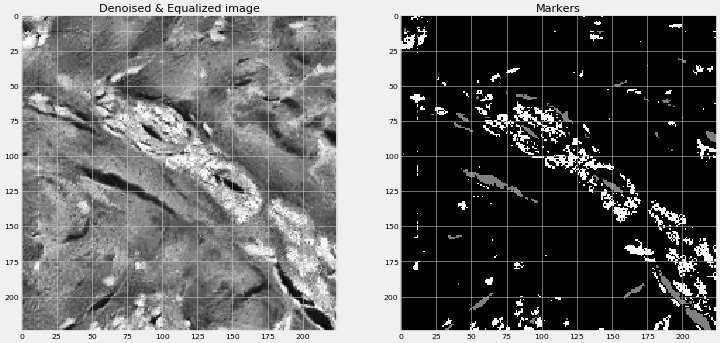

In [163]:
## 1. Define markers and then use them to do random walker segmentation 
# Marker is a 
# You want markers inside the regions where we're highly confident about 

markerz = np.ones( img.shape, dtype=np.uint)

markerz[ (edimg >= 0.0) & (edimg <= 0.15)] = 2
markerz[ (edimg > 0.8) & (edimg < 1)] = 3


all_segz = np.zeros( (*edimg.shape, 3) )
all_segz[ markerz == 2 ] = (1,0,0)
all_segz[ markerz == 3 ] = (0, 1, 1)


plt.subplot(1, 2, 1)
plot_image( edimg , title='Denoised & Equalized image', plotit=True)

plt.subplot(1,2, 2)
plot_image( markerz, title="Markers"); 


------- Denoised & Equalized image -------
image.shape = (225, 225)
datatype = float64
min = 0.0 , max = 1.0


------- RandomWalker Labelz -------
image.shape = (225, 225)
datatype = uint64
min = 1 , max = 3


------- RandomWalker Colorized -------
image.shape = (225, 225, 3)
datatype = float64
min = 0.0 , max = 1.0



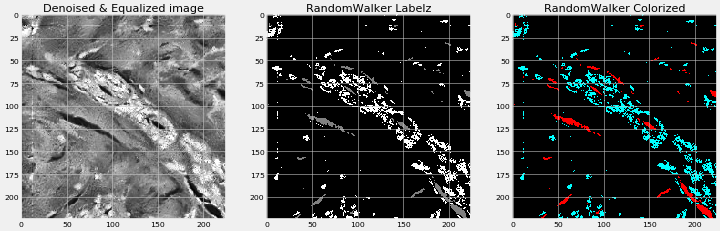

In [164]:
## 2. random walker
from skimage.segmentation import random_walker

labelz = random_walker( edimg, markerz, beta=10, mode='bf')


plt.subplot(1, 3, 1)
plot_image( edimg , title='Denoised & Equalized image', plotit=True)

plt.subplot(1,3, 2)
plot_image( labelz, title="RandomWalker Labelz"); 

plt.subplot(1,3, 3)
plot_image( all_segz, title="RandomWalker Colorized"); 